In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# AUDIO to TEXT

In [ ]:

# Install required libraries
!pip install git+https://github.com/openai/whisper.git
!apt-get install ffmpeg

# Load Whisper model
import whisper
import os

folder_path = "/content/drive/MyDrive/NLP & MOBILE"
output_folder = os.path.join(folder_path, "Transcripts.NLP")
os.makedirs(output_folder, exist_ok=True)

print("🔄 Loading Whisper model (medium)...")
model = whisper.load_model("medium")
print("✅ Model loaded.\n")


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-o6ben5u_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-o6ben5u_
  Resolved https://github.com/openai/whisper.git to commit dd985ac4b90cafeef8712f2998d62c59c3e62d22
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━

100%|█████████████████████████████████████| 1.42G/1.42G [00:19<00:00, 77.0MiB/s]


✅ Model loaded.



In [ ]:

# Transcribe all .mp3 files
mp3_files = [f for f in os.listdir(folder_path) if f.endswith(".mp3")]

print("🎧 Starting transcription...")
for mp3_file in mp3_files:
    full_path = os.path.join(folder_path, mp3_file)
    transcript_filename = os.path.splitext(mp3_file)[0] + ".txt"
    transcript_path = os.path.join(output_folder, transcript_filename)

    if os.path.exists(transcript_path):
        print(f"⏩ Already transcribed: {mp3_file}")
        continue

    print(f"🎙️ Transcribing: {mp3_file}...")
    try:
        result = model.transcribe(full_path)
        with open(transcript_path, "w", encoding="utf-8") as f:
            f.write(result["text"])
        print(f"✅ Saved: {transcript_path}\n")
    except Exception as e:
        print(f"❌ Error with {mp3_file}: {e}")


🎧 Starting transcription...
🎙️ Transcribing: MarChem9_28edit.mp3...


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Saved: /content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/MarChem9_28edit.txt

🎙️ Transcribing: MarChem11_21edit.mp3...


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Saved: /content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/MarChem11_21edit.txt

🎙️ Transcribing: Physical and chemical changes chapter 2 chemistry class 8th ICSE @jatinacademy.mp3...


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Saved: /content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/Physical and chemical changes chapter 2 chemistry class 8th ICSE @jatinacademy.txt



# Clean The Text

In [ ]:
import os
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# === Downloads ===
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

# === Load Models ===
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")  # spaCy for POS tagging + NER

# === Paths ===
transcripts_folder = "/content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP"
cleaned_folder = os.path.join(transcripts_folder, "cleaned")
os.makedirs(cleaned_folder, exist_ok=True)

def clean_and_annotate(text):
    # 1. Lowercase + remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # 2. Tokenization
    words = text.split()

    # 3. Stopword removal + lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)

    # 4. POS tagging & NER using spaCy
    doc = nlp(cleaned_text)

    pos_tags = [(token.text, token.pos_) for token in doc]
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]

    return cleaned_text, pos_tags, named_entities

print(" Starting extended text processing...")
for filename in os.listdir(transcripts_folder):
    if filename.endswith(".txt"):
        original_path = os.path.join(transcripts_folder, filename)
        cleaned_path = os.path.join(cleaned_folder, filename)

        if os.path.exists(cleaned_path):
            print(f" Already processed: {filename}")
            continue

        print(f" Processing: {filename}...")
        try:
            with open(original_path, 'r', encoding='utf-8') as f:
                text = f.read()

            cleaned_text, pos_tags, named_entities = clean_and_annotate(text)

            # Save cleaned text
            with open(cleaned_path, 'w', encoding='utf-8') as f:
                f.write(cleaned_text)

            print(f" Saved cleaned text.")
            print(f" POS Tags Example: {pos_tags[:10]}")
            print(f" Named Entities: {named_entities}\n")

        except Exception as e:
            print(f" Error processing {filename}: {e}")


📘 Starting extended text processing...
⏩ Already processed: MarChem9_28edit.txt
⏩ Already processed: MarChem11_21edit.txt
🧼 Processing: Physical and chemical changes chapter 2 chemistry class 8th ICSE @jatinacademy.txt...
✅ Saved cleaned text.
🔤 POS Tags Example: [('good', 'ADJ'), ('morning', 'NOUN'), ('dear', 'ADJ'), ('student', 'NOUN'), ('welcome', 'NOUN'), ('jatins', 'PROPN'), ('academy', 'PROPN'), ('today', 'NOUN'), ('class', 'NOUN'), ('going', 'VERB')]
🏷️ Named Entities: [('jatins academy', 'ORG'), ('today', 'DATE'), ('second', 'ORDINAL'), ('8th', 'ORDINAL'), ('first', 'ORDINAL'), ('second', 'ORDINAL'), ('firstly', 'ORDINAL'), ('firstly', 'ORDINAL'), ('first', 'ORDINAL'), ('night', 'TIME'), ('24 hour', 'TIME'), ('24 hour night', 'TIME'), ('daily', 'DATE'), ('24 hour', 'TIME'), ('second', 'ORDINAL'), ('second', 'ORDINAL'), ('third', 'ORDINAL'), ('minute', 'TIME'), ('second', 'ORDINAL'), ('one', 'CARDINAL'), ('second', 'ORDINAL'), ('overnight', 'TIME'), ('second', 'ORDINAL'), ('minu

For a sentence like:
"On March 10, Dr. Smith explained chemical reactions in class."

Cleaned Text: march 10 dr smith explained chemical reaction class

POS Tags:
[(march, PROPN), (10, NUM), (dr, PROPN), (smith, PROPN), (explained, VERB), ...]

Named Entities:
[('March 10', 'DATE'), ('Dr. Smith', 'PERSON')]

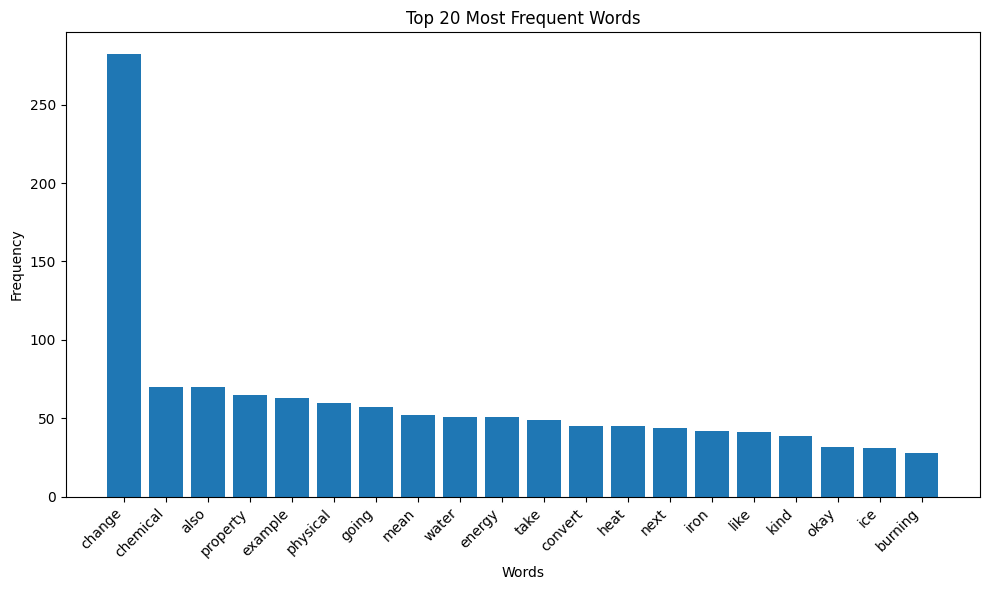

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'cleaned_text' is available after your cleaning process

# Count word frequencies
words = cleaned_text.split()
word_counts = Counter(words)

# Get the most common words (e.g., top 20)
top_words = word_counts.most_common(20)

# Separate words and counts for plotting
words, counts = zip(*top_words)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Keyword Extraction with YAKE

In [ ]:

# # Keyword Extraction with YAKE
# %%
# Install YAKE
!pip install yake

# Import YAKE
import yake
import os

# Define path to cleaned transcripts
cleaned_transcripts_folder = "/content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/cleaned"
keywords_folder = os.path.join("/content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP", "keywords")
os.makedirs(keywords_folder, exist_ok=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 16.8 MB/s eta 0:00:00


In [ ]:


kw_extractor = yake.KeywordExtractor(lan="en", n=3, dedupLim=0.9, top=10, features=None)

print("🔑 Starting keyword extraction with YAKE...")

# Process each cleaned transcript file
for filename in os.listdir(cleaned_transcripts_folder):
    if filename.endswith(".txt"):
        cleaned_transcript_path = os.path.join(cleaned_transcripts_folder, filename)
        keywords_filename = os.path.splitext(filename)[0] + "_keywords.txt"
        keywords_path = os.path.join(keywords_folder, keywords_filename)

        if os.path.exists(keywords_path):
            print(f"⏩ Keywords already extracted for: {filename}")
            continue

        print(f"Extracting keywords from: {filename}...")

        try:
            with open(cleaned_transcript_path, 'r', encoding='utf-8') as f:
                cleaned_text = f.read()

            # Extract keywords
            keywords = kw_extractor.extract_keywords(cleaned_text)

            # Keywords are returned as a list of tuples (keyword, score)
            # We'll save the keywords themselves, one per line
            with open(keywords_path, 'w', encoding='utf-8') as f:
                for kw, score in keywords:
                    f.write(f"{kw}\n")

            print(f"✅ Saved keywords to: {keywords_path}\n")

        except Exception as e:
            print(f"❌ Error extracting keywords from {filename}: {e}")

print("\n✅ Finished keyword extraction.")

🔑 Starting keyword extraction with YAKE...
⏩ Keywords already extracted for: MarChem11_21edit.txt
Extracting keywords from: Physical and chemical changes chapter 2 chemistry class 8th ICSE @jatinacademy (2).txt...
✅ Saved keywords to: /content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/keywords/Physical and chemical changes chapter 2 chemistry class 8th ICSE @jatinacademy (2)_keywords.txt

⏩ Keywords already extracted for: MarChem9_28edit.txt
⏩ Keywords already extracted for: Physical and chemical changes chapter 2 chemistry class 8th ICSE @jatinacademy.txt

✅ Finished keyword extraction.


# T5

In [ ]:
# %%
import os

# Define paths
t5_summary_folder = "/content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/T5summary"
cleaned_transcripts_folder = "/content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/cleaned"
# Add the path to your keywords folder
keywords_folder = "/content/drive/MyDrive/NLP & MOBILE/Transcripts.NLP/keywords"


print("Generating and printing structured reports using T5 summaries and YAKE keywords...\n")

# Process each original cleaned transcript file
for filename in os.listdir(cleaned_transcripts_folder):
    if filename.endswith(".txt"):
        original_filename_base = os.path.splitext(filename)[0]
        t5_summary_filename = original_filename_base + "_t5_summary.txt"
        t5_summary_path = os.path.join(t5_summary_folder, t5_summary_filename)
        # Define the path to the corresponding keyword file
        keywords_filename = original_filename_base + "_keywords.txt"
        keywords_path = os.path.join(keywords_folder, keywords_filename)


        if not os.path.exists(t5_summary_path):
            print(f"❌ T5 summary not found for: {filename}")
            continue

        # Check if keyword file exists, if not, indicate that keywords are not available
        extracted_keywords = "[Keywords not available]"
        if os.path.exists(keywords_path):
            try:
                with open(keywords_path, 'r', encoding='utf-8') as f:
                    # Read all keywords and join them with a comma and space
                    extracted_keywords = ", ".join([line.strip() for line in f])
            except Exception as e:
                 print(f"❌ Error reading keywords from {keywords_filename}: {e}")
                 extracted_keywords = "[Error reading keywords]"


        print(f"Generating report for: {filename}...")

        try:
            with open(t5_summary_path, 'r', encoding='utf-8') as f:
                t5_summary_text = f.read()

            # Placeholder fields (replace with actual extraction logic if needed,
            # or keep as placeholders if these are not extracted automatically)
            teacher_name = "[Extracted Name]"
            subject_name = "[Extracted Subject]"
            assignment_topic = "[Assignment Topic]"
            assignment_due_date = "[Due Date]"
            assignment_requirements = "[Details like word count, format, etc.]"
            quiz_topic = "[Quiz Topic]"
            quiz_date = "[Quiz Date]"

            # Use the T5 summary for the main summary and a shorter version for the small summary
            main_summary = t5_summary_text
            small_summary = t5_summary_text.split('.')[0] + "." if '.' in t5_summary_text else t5_summary_text[:100] # Simple approach for small summary

            # Main points extraction (you can use a different method here if needed,
            # or try to extract sentences from the T5 summary if it's long enough)
            # For simplicity, let's use the T5 summary text and split into points (assuming each sentence is a point)
            main_points = [point.strip() for point in t5_summary_text.split('.') if point.strip()][:3]

            # Format structured report - NOW USING extracted_keywords for "Main Topic"
            structured_report = f"""Teacher Name     : {teacher_name}
Subject Name     : {subject_name}
Main Topic       : {extracted_keywords}

 Summary of the Class:
{main_summary}

Assignment:
- Topic           : {assignment_topic}
- Date of Submission: {assignment_due_date}
- Requirements    : {assignment_requirements}

 Quiz:
- Topic           : {quiz_topic}
- Date            : {quiz_date}

 Small Summary:
{small_summary}

Main Points from the Class:
"""
            for point in main_points:
                structured_report += f"- {point}\n"

            # Print the structured report
            print(structured_report)
            print("-" * 50) # Separator for clarity between reports

        except Exception as e:
            print(f"❌ Error processing report for {filename}: {e}")

print("\n✅ Finished generating and printing structured reports using T5 summaries.")

Generating and printing structured reports using T5 summaries and YAKE keywords...

Generating report for: MarChem11_21edit.txt...
Teacher Name     : [Extracted Name]
Subject Name     : [Extracted Subject]
Main Topic       : carbonate ion concentration, calcium carbonate sediment, calcium carbonate concentration, dissolution calcium carbonate, sediment water interface, percent calcium carbonate, calcium carbonate dissolving, calcite saturation horizon, salicylic acid concentration, calcium carbonate

 Summary of the Class:
the following content is provided under a Creative Commons license. your support will help MIT OpenCourseWare continue to offer high quality educational resources for free. to make a donation or view additional materials from hundreds of MIT courses, visit ocw.mit.edu.

Assignment:
- Topic           : [Assignment Topic]
- Date of Submission: [Due Date]
- Requirements    : [Details like word count, format, etc.]

 Quiz:
- Topic           : [Quiz Topic]
- Date         

In [ ]:
!pip install spacy
!python3 -m spacy download en_core_web_lg
!pip install pytextrank

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import spacy
import pytextrank

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load spaCy + pyTextRank
nlp = spacy.load("en_core_web_lg")
if "textrank" not in nlp.pipe_names:
    nlp.add_pipe("textrank")

# Input transcript (replace as needed)
transcribed_text = """
The class today started with the teacher introducing the topic of cell division, specifically mitosis.
The teacher explained that mitosis is the process by which a single cell divides into two identical daughter cells.
The teacher then showed a diagram of the cell cycle, explaining the stages of interphase, prophase, metaphase, anaphase, and telophase.
The students were engaged and asked several questions about how the chromosomes align during metaphase and how the cell ensures the genetic material is equally distributed during anaphase.

After discussing the stages of mitosis, the teacher transitioned into explaining the importance of cytokinesis, the final step of cell division.
Cytokinesis occurs after mitosis and is responsible for dividing the cytoplasm between the two daughter cells.
The teacher emphasized how this process is crucial for the proper growth and development of organisms.
The students seemed intrigued and asked about the differences in cytokinesis between plant and animal cells.
The teacher explained that in plant cells, a cell plate forms, while in animal cells, the process involves a cleavage furrow.

The class then shifted focus to meiosis, the process by which gametes are formed. The teacher explained that meiosis is a type of cell division that reduces the chromosome number by half, which is essential for sexual reproduction.
The students were curious about the differences between meiosis and mitosis, and the teacher highlighted the main differences in the number of divisions and the end result:
two daughter cells in mitosis and four in meiosis. The teacher also explained the concept of genetic recombination during meiosis and how this contributes to genetic diversity.

Before wrapping up, the teacher mentioned that the upcoming quiz would cover the concepts of both mitosis and meiosis, as well as the differences between them.
The teacher handed out a homework assignment on cell division, which required the students to complete a worksheet that involves labeling diagrams of the cell cycle and answering questions about each stage.

The teacher concluded the lecture by reminding the students to study for the quiz, which would be held next week, and emphasized the importance of understanding the key differences between mitosis and meiosis.
The session ended with a brief review of the key points, and the teacher answered a few more questions from the students about the cell division processes.
"""

# Prompt for subject/topic
subject_title = input("Enter subject name or topic: ").strip() or "Subject Not Provided"

# Generate summary with pyTextRank (limit sentences for clarity)
def generate_summary_textrank(text, limit_sentences=6):
    doc = nlp(text)
    summary_sentences = [sent.text for sent in doc._.textrank.summary(limit_sentences=limit_sentences)]
    return " ".join(summary_sentences)

# Extract concise bullet points from the summary
def summary_to_brief_points(text):
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    return "\n".join(f"- {s.strip()}" for s in sentences if s)

# Improved topic extraction: removes generic filler phrases/entities
def extract_relevant_topics(text, top_n=8):
    doc = nlp(text)
    noun_phrases = [chunk.text.lower().strip() for chunk in doc.noun_chunks]
    named_entities = [ent.text.lower().strip() for ent in doc.ents if ent.label_ not in [
        "DATE", "TIME", "PERCENT", "MONEY", "QUANTITY", "ORDINAL", "CARDINAL"]]

    all_phrases = noun_phrases + named_entities
    blacklist = {'the teacher', 'the students', 'which', 'who', 'that', 'what', 'we', 'i', 'it'}

    phrase_freq = {}
    for phrase in all_phrases:
        if len(phrase) > 3 and phrase not in blacklist:
            phrase_freq[phrase] = phrase_freq.get(phrase, 0) + 1

    sorted_phrases = sorted(phrase_freq.items(), key=lambda x: x[1], reverse=True)
    return [phrase for phrase, _ in sorted_phrases[:top_n]]

# Assignment/quiz/homework extractor using regex
def extract_assignments(text):
    keywords = ["assignment", "quiz", "homework", "exam", "worksheet", "test", "due date"]
    matches = []
    for keyword in keywords:
        found = re.findall(rf"([^.]*\b{re.escape(keyword)}\b[^.]*\.)", text, flags=re.IGNORECASE)
        matches.extend(found)
    if not matches:
        return "No assignments or quizzes identified."
    return "\n".join(f"- {m.strip()}" for m in sorted(set(matches)))

# Process the transcript
lecture_summary = generate_summary_textrank(transcribed_text, limit_sentences=6)
lecture_summary = " ".join(line.strip() for line in lecture_summary.splitlines() if line.strip())
brief_points = summary_to_brief_points(lecture_summary)
main_topics = extract_relevant_topics(transcribed_text)
assignments_quizzes_homework = extract_assignments(transcribed_text)

# Format markdown output
markdown_notes = f"# Classroom Lecture Notes\n\n"
markdown_notes += f"**Subject Details:** {subject_title}\n\n"
markdown_notes += f"## Main Topics Covered\n{', '.join(main_topics)}\n\n"
markdown_notes += f"## Lecture Summary\n{lecture_summary}\n\n"
markdown_notes += f"## Brief Points\n{brief_points}\n\n"
markdown_notes += f"## Assignments/Quizzes/Homework\n{assignments_quizzes_homework}\n"

# Output
print("\n" + markdown_notes)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter subject name or topic: social

# Classroom Lecture Notes

**Subject Details:** social

## Main Topics Covered
mitosis, meiosis, cell division, cytokinesis, the differences, the class, the process, the cell cycle

## Lecture Summary
The teacher explained that in plant cells, a cell plate forms, while in animal cells, the process involves a cleavage furrow. The teacher explained that meiosis is a type of cell division that reduces the chromosome number by half, which is essential for sexual reproduction. The class today started with the teacher introducing the topic of cell division, specifically mitosis. After discussing the stages of mitosis, the teacher transitioned into explaining the importance of cytokinesis, the final step of cell division. The teacher handed out a homework assignment on cell division, which required the students to complete a worksheet that involves labeling diagrams of the cell cycle and answering questions about each stage. The students were curious about

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import spacy
import pytextrank
import os

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load spaCy with pyTextRank
nlp = spacy.load("en_core_web_lg")
if "textrank" not in nlp.pipe_names:
    nlp.add_pipe("textrank")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Directory containing class transcripts
folder_path = "/content/drive/MyDrive/NLP & MOBILE/Transcript"

# Function to generate summary
def generate_summary_textrank(text, limit_sentences=6):
    doc = nlp(text)
    summary_sentences = [sent.text for sent in doc._.textrank.summary(limit_sentences=limit_sentences)]
    return " ".join(summary_sentences)

# Convert summary to bullet points
def summary_to_brief_points(text):
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    return [s.strip() for s in sentences if s]

# Extract main topics
def extract_relevant_topics(text, top_n=5):
    doc = nlp(text)
    noun_phrases = [chunk.text.lower().strip() for chunk in doc.noun_chunks]
    named_entities = [ent.text.lower().strip() for ent in doc.ents if ent.label_ not in [
        "DATE", "TIME", "PERCENT", "MONEY", "QUANTITY", "ORDINAL", "CARDINAL"]]
    all_phrases = noun_phrases + named_entities
    blacklist = {'the teacher', 'the students', 'which', 'who', 'that', 'what', 'we', 'i', 'it'}
    phrase_freq = {}
    for phrase in all_phrases:
        if len(phrase) > 3 and phrase not in blacklist:
            phrase_freq[phrase] = phrase_freq.get(phrase, 0) + 1
    sorted_phrases = sorted(phrase_freq.items(), key=lambda x: x[1], reverse=True)
    return [phrase for phrase, _ in sorted_phrases[:top_n]]

# Extract assignment and quiz info
def extract_assignments(text):
    keywords = ["assignment", "quiz", "homework", "exam", "worksheet", "test", "due date"]
    matches = []
    for keyword in keywords:
        found = re.findall(rf"([^.]*\b{re.escape(keyword)}\b[^.]*\.)", text, flags=re.IGNORECASE)
        matches.extend(found)
    return sorted(set(matches)) if matches else []

# Loop through each file in folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as f:
            transcribed_text = f.read()

        # Inferred subject name from filename (or ask)
        subject_name = os.path.splitext(filename)[0].capitalize()

        # NLP processing
        summary = generate_summary_textrank(transcribed_text)
        brief_points = summary_to_brief_points(summary)
        topics = extract_relevant_topics(transcribed_text)
        assignment_quiz_info = extract_assignments(transcribed_text)

        # Heuristics to identify topics for labels
        main_topic = topics[0].capitalize() if topics else "Cell Division"
        quiz_topic = "Mitosis and Meiosis" if "mitosis" in transcribed_text.lower() else main_topic
        quiz_date = "Next Week" if "next week" in transcribed_text.lower() else "TBA"
        assignment_topic = main_topic
        due_date = "As per instructions" if "due" in transcribed_text.lower() else "Not mentioned"
        req_summary = next((x for x in assignment_quiz_info if "worksheet" in x.lower()), "Worksheet on class topic.")

        # Small recap
        small_summary = "This class discussed the key stages and differences in biological processes. Students asked insightful questions and were given assignments and a quiz reminder."

        # Final formatted output
        print(f"\n{'='*80}\n📘 **Lecture Summary for File: {filename}**\n{'='*80}")
        print(f"Subject Name     : {subject_name}")
        print(f"Main Topic       : {main_topic.capitalize()}\n")
        print("📄 Summary of the Class:")
        print(summary.strip(), "\n")
        print("📝 Assignment:")
        print(f"- Topic           : {assignment_topic}")
        print(f"- Date of Submission: {due_date}")
        print(f"- Requirements    : {req_summary}\n")
        print("📊 Quiz:")
        print(f"- Topic           : {quiz_topic}")
        print(f"- Date            : {quiz_date}\n")
        print("📌 Small Summary:")
        print(small_summary, "\n")
        print("📚 Main Points from the Class:")
        for i, point in enumerate(brief_points[:6], 1):
            print(f"- {point}")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📘 **Lecture Summary for File: Class1.txt**
Subject Name     : Class1
Main Topic       : Photosynthesis

📄 Summary of the Class:
The teacher clarified that oxygen is a by-product and is released into the atmosphere, benefiting both the plant and surrounding organisms.
After completing the discussion on photosynthesis, the teacher transitioned into cellular respiration, describing it as the process by which cells convert glucose and oxygen into ATP (energy), carbon dioxide, and water.
 The teacher explained that photosynthesis is the process by which green plants use sunlight, carbon dioxide, and water to produce glucose and oxygen. The class compared the two processes in a table: photosynthesis stores energy, while cellular respiration releases it. The teacher highlighted the location of each process (cytoplasm and mitochondria) and emphasized that cellular r

In [ ]:
!pip install gradio

import gradio as gr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import spacy
import pytextrank
import os

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')


# Load spaCy with pyTextRank
nlp = spacy.load("en_core_web_lg")
if "textrank" not in nlp.pipe_names:
    nlp.add_pipe("textrank")


# Function to generate summary using pyTextRank
def generate_summary_textrank(text, limit_sentences=6):
    doc = nlp(text)
    summary_sentences = [sent.text for sent in doc._.textrank.summary(limit_sentences=limit_sentences)]
    return " ".join(summary_sentences)

# Convert summary to bullet points
def summary_to_brief_points(text):
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    return [s.strip() for s in sentences if s]

# Extract main topics
def extract_relevant_topics(text, top_n=5):
    doc = nlp(text)
    noun_phrases = [chunk.text.lower().strip() for chunk in doc.noun_chunks]
    named_entities = [ent.text.lower().strip() for ent in doc.ents if ent.label_ not in [
        "DATE", "TIME", "PERCENT", "MONEY", "QUANTITY", "ORDINAL", "CARDINAL"]]
    all_phrases = noun_phrases + named_entities
    blacklist = {'the teacher', 'the students', 'which', 'who', 'that', 'what', 'we', 'i', 'it'}
    phrase_freq = {}
    for phrase in all_phrases:
        if len(phrase) > 3 and phrase not in blacklist:
            phrase_freq[phrase] = phrase_freq.get(phrase, 0) + 1
    sorted_phrases = sorted(phrase_freq.items(), key=lambda x: x[1], reverse=True)
    return [phrase for phrase, _ in sorted_phrases[:top_n]]

# Extract assignment and quiz info
def extract_assignments(text):
    keywords = ["assignment", "quiz", "homework", "exam", "worksheet", "test", "due date"]
    matches = []
    for keyword in keywords:
        found = re.findall(rf"([^.]*\b{re.escape(keyword)}\b[^.]*\.)", text, flags=re.IGNORECASE)
        matches.extend(found)
    return sorted(set(matches)) if matches else []

def generate_structured_report(transcribed_text, subject_name="Subject Not Provided"):
    """Generates a structured report from transcribed text."""

    summary = generate_summary_textrank(transcribed_text)
    brief_points = summary_to_brief_points(summary)
    topics = extract_relevant_topics(transcribed_text)
    assignment_quiz_info = extract_assignments(transcribed_text)

    # Heuristics to identify topics for labels
    main_topic = topics[0].capitalize() if topics else "Cell Division"
    quiz_topic = "Mitosis and Meiosis" if "mitosis" in transcribed_text.lower() else main_topic
    quiz_date = "Next Week" if "next week" in transcribed_text.lower() else "TBA"
    assignment_topic = main_topic
    due_date = "As per instructions" if "due" in transcribed_text.lower() else "Not mentioned"
    req_summary = next((x for x in assignment_quiz_info if "worksheet" in x.lower()), "Worksheet on class topic.")

    # Small recap
    small_summary = "This class discussed the key stages and differences in biological processes. Students asked insightful questions and were given assignments and a quiz reminder."

    # Format structured report
    report = f"Subject Name     : {subject_name}\n"
    report += f"Main Topic       : {main_topic.capitalize()}\n\n"
    report += "📄 Summary of the Class:\n"
    report += summary.strip() + "\n\n"
    report += "📝 Assignment:\n"
    report += f"- Topic           : {assignment_topic}\n"
    report += f"- Date of Submission: {due_date}\n"
    report += f"- Requirements    : {req_summary}\n\n"
    report += "📊 Quiz:\n"
    report += f"- Topic           : {quiz_topic}\n"
    report += f"- Date            : {quiz_date}\n\n"
    report += "📌 Small Summary:\n"
    report += small_summary + "\n\n"
    report += "📚 Main Points from the Class:\n"
    for i, point in enumerate(brief_points[:6], 1):
        report += f"- {point}\n"

    return report

# Create Gradio interface with styling
iface = gr.Interface(
    fn=generate_structured_report,
    inputs=[
        gr.Textbox(lines=20, label="Enter Transcribed Text", placeholder="Paste your class transcript here..."),
        gr.Textbox(label="Enter Subject Name (Optional)", placeholder="e.g., Biology, Chemistry, History")
        ],
    outputs=gr.Textbox(lines=20, label="Structured Report"),
    title="<h1 align='center'>📚 Classroom Lecture Summarizer</h1>",
    description="<p align='center'>Enter your class transcript to generate a structured summary, extract key topics, and identify assignments/quizzes.</p>",
    theme=gr.themes.Soft(), # Apply a theme
    css="""
    h1 { color: #1E90FF; } /* Dodger Blue */
    p { color: #36454F; }  /* Charcoal */
    .gradio-container { background-color: #F0F8FF; } /* Alice Blue */
    """ # Custom CSS for more styling
)

# Launch the interface
iface.launch(share=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f780c7c317b353eaab.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
